In [45]:
import pandas as pd
import numpy as np


In [115]:
def get_data(grade, subject):
    ret = pd.read_excel(
        "data/"+str(grade)+"th grade "+subject+".xls",
        header=[0,1], skiprows=10)
    
    for i, col in enumerate(ret.columns.levels):
        columns = np.where(col.str.contains('Unnamed'), '', col)
        ret.columns.set_levels(columns, level=i, inplace=True)

    ret["","Year"] = ret["","Year"].fillna(method="ffill")
    
    flat_columns = []
    for col in ret.columns:
        flat_columns.append((col[0] + " " + col[1]).strip())
        
    ret.columns = flat_columns
    
    for c in ret.columns[2:]:
        ret[c] = pd.to_numeric(ret[c],errors="coerce")
    
    ret = ret.dropna(thresh = 4)
    
    left = pd.pivot_table(ret,index=["Year"],
                        values=["Eligible Average scale score"],
                        columns=["Jurisdiction"])

    right = pd.pivot_table(ret,index=["Year"],
                        values=["Not eligible Average scale score"],
                        columns=["Jurisdiction"])
    
    ret = left.join(right)
    
    ret["subject"] = subject
    ret["grade"] = grade

        
    return ret


get_data(8,"math").sort_index(ascending=False)

Eligible Average scale score                            \
Jurisdiction                  Connecticut Massachusetts    National   
Year                                                                  
2015                           261.184696    278.710379  268.022808   
2013                           262.755261    280.737746  269.886864   
2011                           264.349178    280.023871  268.994906   
2009                           263.459865    278.138278  266.397729   
2007                           255.982232    274.605274  264.866142   
2005                           254.643595    273.018781  261.625962   
2003                           260.269848    261.032204  259.123560   
2000¹                          250.675634    260.818559  254.870256   
2000                           250.489565    256.928981  252.855800   
1996¹                          254.226370    253.686961  251.527775   
1996                                  NaN           NaN  250.278211   

             Not eligible Average scale score                            \
Jurisdiction                      Connecticut Massachusetts    National   
Year                                                                      
2015                               296.148755    310.880598  295.836850   
2013                               297.000848    312.842032  297.107582   
2011                               298.049598    307.612399  295.557662   
2009                               297.586853    307.452342  293.520815   
2007                               292.112114    306.037152  291.169934   
2005                               291.710699    299.008816  288.427822   
2003                               292.182413    294.757190  287.091747   
2000¹                              291.876675    288.868266  284.731416   
2000                               290.508315    286.176569  283.143335   
1996¹                              287.115203    284.008569  279.564954   
1996                                      NaN           NaN  277.381764   

             subject grade  
Jurisdiction                
Year                        
2015            math     8  
2013            math     8  
2011            math     8  
2009            math     8  
2007            math     8  
2005            math     8  
2003            math     8  
2000¹           math     8  
2000            math     8  
1996¹           math     8  
1996            math     8

In [146]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt



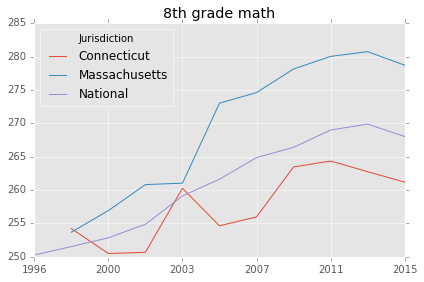

In [166]:
def make_chart(df):
    
    ax = df["Eligible Average scale score"].plot()
    #ax.set_ylim(ymin=0)
    
    grade = df["grade"][0]
    subject = df["subject"][0]
    ax.set_title(str(grade) + "th grade " + subject)    
    fname = "img/"+str(grade)+ "th grade " + str(subject) + ".png"
    ax.set_xlabel("")
    ax.set_ylabel("")

    
    plt.tight_layout()
    
    plt.savefig(fname)
    
    
make_chart(get_data(8,"math"))

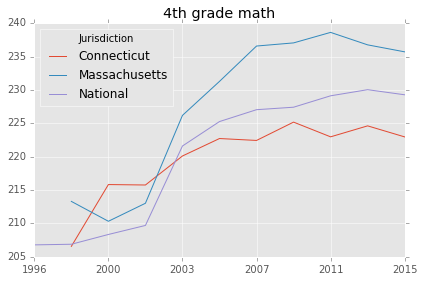

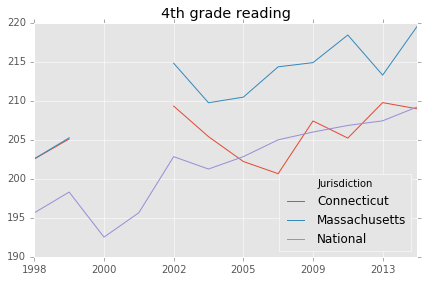

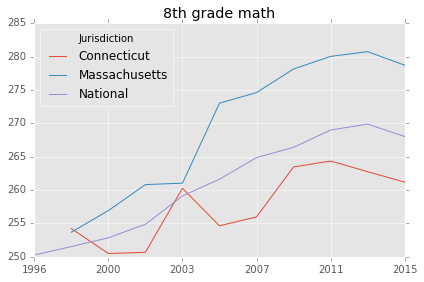

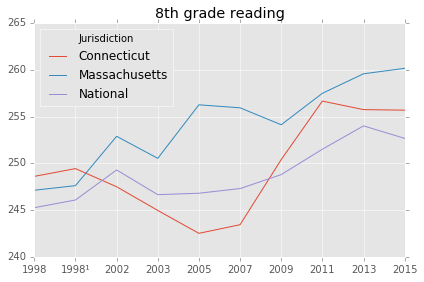

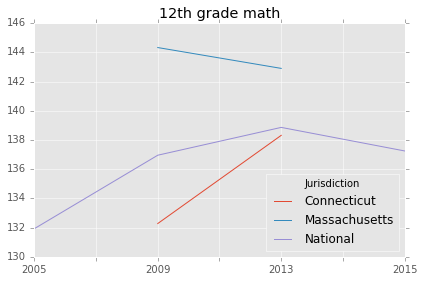

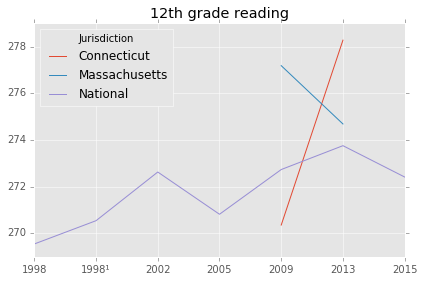

In [167]:
def make_all_charts():
    for grade in [4,8,12]:
        for subject in ["math","reading"]:
            make_chart(get_data(grade, subject))
            
make_all_charts()